Using the Logistic regression to identify the flower species from the sepal, petal width and length

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_iris

Loading the iris dataet from sklearn

In [2]:
iris = load_iris()

In [3]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [4]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df["target"] = iris.target

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

Mapping the flower species into the dataframe

In [6]:
target_names = {0 : 'setosa', 1 : 'versicolor', 2 : 'virginica'}

In [7]:
df['target'] = df['target'].map(target_names)

In [8]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Plotting the flower species in scatter graph sepal width vs sepal length

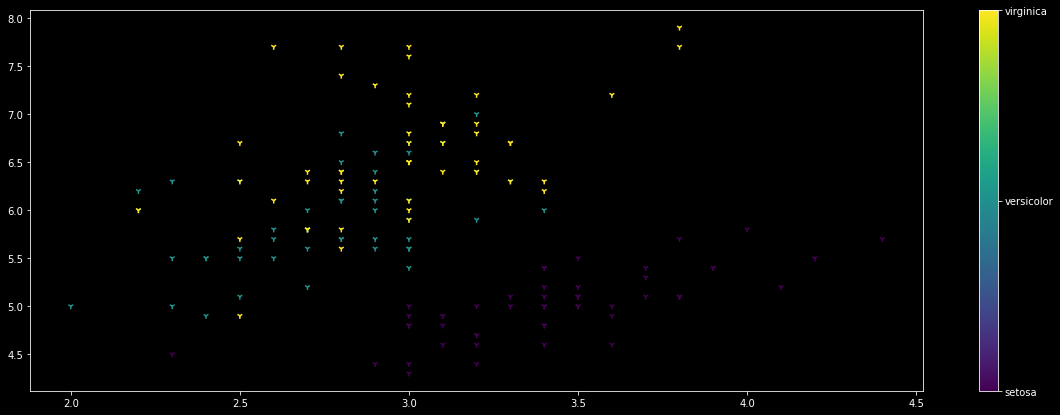

In [9]:
plt.style.use(['dark_background'])
plt.rcParams["figure.figsize"] = (20, 7)

formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(df["sepal width (cm)"], df["sepal length (cm)"], marker="1", c = iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)

Plotting the flower species in scatter graph petal width vs petal length

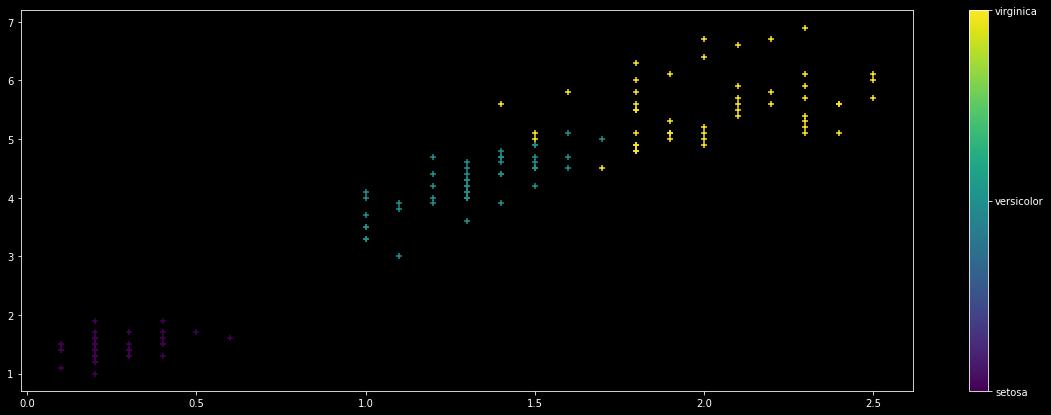

In [10]:
plt.scatter(df["petal width (cm)"], df["petal length (cm)"], marker="+", c = iris.target)
plt.colorbar(ticks=[0, 1, 2], format=formatter)

Lets, bulid, train and test the model

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

In [12]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [13]:
model.predict(X_test)

array([2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 2])

In [14]:
y_test

array([2, 2, 2, 2, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0, 1, 0, 2, 2, 1, 2,
       2, 2, 0, 0, 1, 1, 2, 2])

In [15]:
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9833333333333333, 0.9666666666666667)

Visiualise the confusion matrix

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred) # actual values vs the predicted values
cm

array([[ 7,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 12]], dtype=int64)

Text(33.0, 0.5, 'Actual Values')

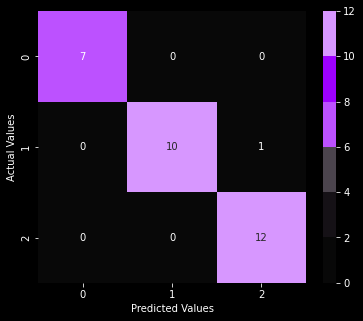

In [17]:
import seaborn as sn
plt.rcParams["figure.figsize"] = (6, 5)

colormap = sn.color_palette([ "#080808", "#151116", "#4b444d", "#bc51ff", "#9d00ff", "#d797ff"])
sn.heatmap(cm, cmap=colormap, annot=True)

plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")